In [14]:
import pandas as pd
from Find_Bus_Stops_Function import bus_stops_searcher
from Google_Rate_Apt_Function import dataframe_to_list, append_ratings_to_listings, create_apartment_ranking_table
import googlemaps
import sys
# Append the './Apartments' directory to the system path to enable importing custom modules
sys.path.append('./Apartments')
# Import custom modules for scraping apartment data
import some_apartments
import Wampler
import MHM
import Ugroup
import some_apartments

In [8]:
# Retrieve apartment data from different sources using custom scraping functions

# MHM Properties
MHM = MHM.get_MHM('https://www.mhmproperties.com/apartments/?_sft_types=apartments')
# Wampler Apartments
Wampler = Wampler.get_wampler('https://wamplerapartments.com/our-properties/')
# Ugroup Properties
Ugroup = Ugroup.get_ugroup('https://ugroupcu.com/building-list/')
# Additional Apartments (Bailey, Green_Street, JSJ, JSM)
some_apt = some_apartments.get_some_apt()

In [9]:
# Combine data from all sources into a DataFrame
frames = [*MHM, *Wampler, *Ugroup, *some_apt]
All_apt = pd.DataFrame(frames, columns =['Address', 'Price', 'Bedroom', 'Bathroom', 'Link', 'Availability', 'Name', 'Is_studio'])

# Display the entire DataFrame containing apartment information
All_apt

,Address,Price,Bedroom,Bathroom,Link,Availability,Name,Is_studio
0,303 S. Fifth Street,NaN,1.0,1.0,https://www.mhmproperties.com/property/303-s-f...,False,MHM,True
1,303 S. Fifth Street,NaN,2.0,2.0,https://www.mhmproperties.com/property/303-s-f...,False,MHM,True
2,303 S. Fifth Street,NaN,3.0,3.0,https://www.mhmproperties.com/property/303-s-f...,False,MHM,True
3,303 S. Fifth Street,985.0,4.0,4.0,https://www.mhmproperties.com/property/303-s-f...,2024-2025,MHM,True
4,314 E. Clark Street,NaN,2.0,2.0,https://www.mhmproperties.com/property/314-e-c...,False,MHM,False
...,...,...,...,...,...,...,...,...
693,700 S. Gregory,1400.0,1.0,1.0,https://jsmliving.com/index.php/node/130642?b...,2024-08-01,JSM,False
694,701 S. Gregory,1100.0,1.0,1.0,https://jsmliving.com/index.php/node/130789?b...,2024-08-01,JSM,False
695,707 S. Sixth,1600.0,2.0,1.0,https://jsmliving.com/node/130895?bedrooms=2&...,2024-08-01,JSM,False
696,902 S. Lincoln,1215.0,1.0,1.0,https://jsmliving.com/index.php/node/131010?b...,2024-08-01,JSM,False


In [12]:
# Search for apartments with more than 2 bathrooms
All_apt[All_apt['Bathroom']>2]

,Address,Price,Bedroom,Bathroom,Link,Availability,Name,Is_studio
2,303 S. Fifth Street,NaN,3.0,3.0,https://www.mhmproperties.com/property/303-s-f...,False,MHM,True
3,303 S. Fifth Street,985.0,4.0,4.0,https://www.mhmproperties.com/property/303-s-f...,2024-2025,MHM,True
9,606 E. White Street,NaN,3.0,3.0,https://www.mhmproperties.com/property/606-e-w...,False,MHM,True
10,606 E. White Street,NaN,3.0,3.0,https://www.mhmproperties.com/property/606-e-w...,False,MHM,True
19,203 S. Fourth Street,NaN,4.0,3.0,https://www.mhmproperties.com/property/203-s-f...,False,MHM,True
63,"601 S. First, Champaign",2985.0,3.0,3.0,https://ugroupcu.com/property-details/601-s-fi...,available august 2024! request a virtual tour...,Ugroup,False
64,"601 S. First, Champaign",3980.0,4.0,4.0,https://ugroupcu.com/property-details/601-s-fi...,available august 2024! request a virtual tour...,Ugroup,False
73,"507 S. Locust, Champaign",4170.0,4.0,3.5,https://ugroupcu.com/property-details/507-sout...,"immediate move-in : december 2023, available ...",Ugroup,False
74,"507 S. Locust, Champaign",4170.0,4.0,3.5,https://ugroupcu.com/property-details/507-sout...,available august 2024! request a virtual tour...,Ugroup,False
75,"507 S. Locust, Champaign",4170.0,6.0,3.5,https://ugroupcu.com/property-details/507-sout...,available august 2024! request a virtual tour...,Ugroup,False


In [5]:
#Search for apartments with rents under 1000
All_apt[All_apt['Price']<1000]

,Address,Price,Bedroom,Bathroom,Link,Availability,Name,Is_studio
3,303 S. Fifth Street,985.0,4,4.0,https://www.mhmproperties.com/property/303-s-f...,2024-2025,MHM,True
6,314 E. Clark Street,895.0,3,2.0,https://www.mhmproperties.com/property/314-e-c...,2024-2025,MHM,False
25,805 S. Locust Street,495.0,4,2.0,https://www.mhmproperties.com/property/805-s-l...,2024-2025,MHM,False
26,"106 E. John St. / Champaign,",810.0,1,1.0,https://wamplerapartments.com/listings/breeze-...,2024-08,Wampler,False
27,"108 E. John St. / Champaign,",945.0,1,1.0,https://wamplerapartments.com/listings/breeze-...,2024-08,Wampler,False
...,...,...,...,...,...,...,...,...
681,508 E. Stoughton,960.0,1,1.0,https://jsmliving.com/node/130250?bedrooms=1&...,2024-08-01,JSM,False
685,602 E. Clark,915.0,1,1.0,https://jsmliving.com/node/130432?bedrooms=0&...,2024-08-01,JSM,True
686,603 E. White,985.0,1,1.0,https://jsmliving.com/node/130466?bedrooms=1&...,2024-08-01,JSM,False
688,605 E. White,985.0,1,1.0,https://jsmliving.com/node/130504?bedrooms=1&...,2024-08-01,JSM,False


In [6]:
# Check the transportation condition near a specific address (e.g., '28 E Green St, Champaign')
bus_map = bus_stops_searcher('28 E Green St, Champaign')

# Display the map of nearby bus stops
bus_map

In [ ]:
# Add the Google Map Rating for each apartment

#clean and prepare the data
updated_list = dataframe_to_list(All_apt)
# input your Google API
gmaps = googlemaps.Client(key='')
# Get rated apartments
Rated_apt = append_ratings_to_listings(updated_list)

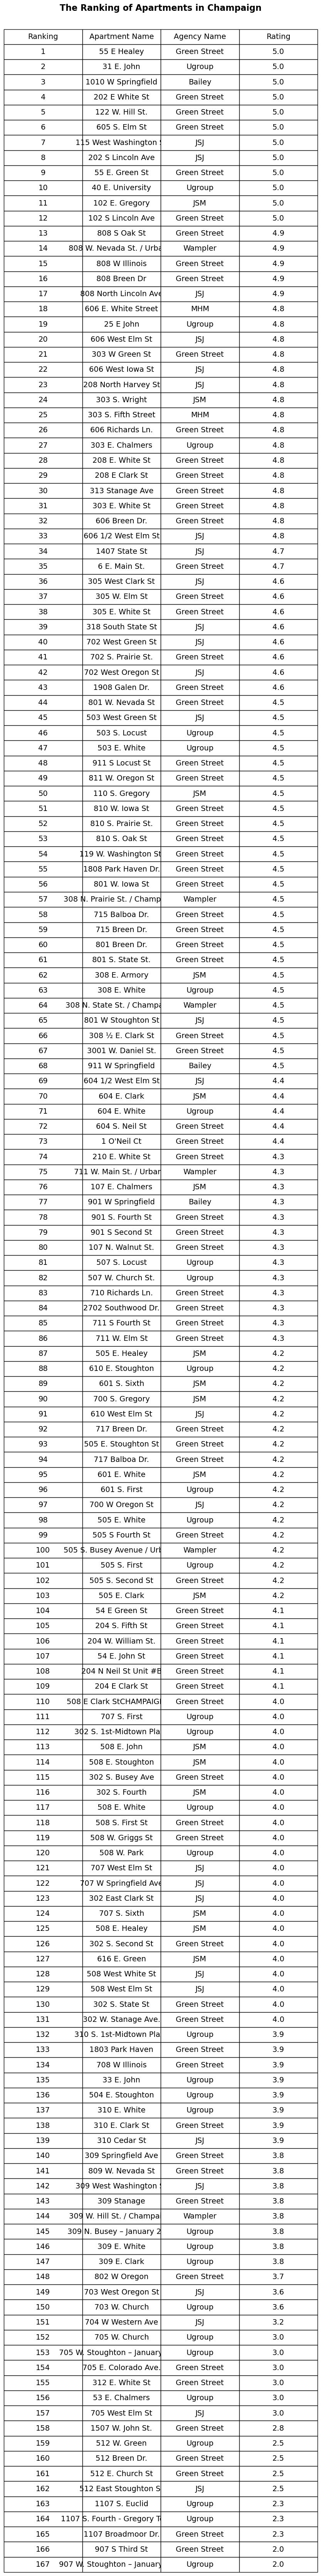

In [46]:
# Rank Apartments in a descending order
create_apartment_ranking_table(Rated_apt)